In [506]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

In [523]:
df = pd.read_csv('aac_shelter_outcomes.csv')
df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_upon_outcome  78248 non-null  object
 1   animal_id         78256 non-null  object
 2   animal_type       78256 non-null  object
 3   breed             78256 non-null  object
 4   color             78256 non-null  object
 5   date_of_birth     78256 non-null  object
 6   datetime          78256 non-null  object
 7   monthyear         78256 non-null  object
 8   name              54370 non-null  object
 9   outcome_subtype   35963 non-null  object
 10  outcome_type      78244 non-null  object
 11  sex_upon_outcome  78254 non-null  object
dtypes: object(12)
memory usage: 7.2+ MB


В данных есть пустые значения: age_upon_outcome, name, outcome_subtype, outcome_type, sex_upon_outcome.  

В outcome_type нас интересует только два результата: 'Adoption' и 'Transfer', все остальное можно отнести к группе "другие".

Очевидно, что id нам никак не поможет, этот столбец можно удалить.
Имя можно дать животному любое, можно также удалить.

age_upon_outcome будет совпадать с datetime - date_of_birth, можно посчитать возраст в днях и все столбцы с датами удалить и age_upon_outcome удалить.


In [525]:
df['date_of_birth_1'] = pd.to_datetime(df.date_of_birth, format='%Y-%m-%d')
df['date_of_birth_1'] = df['date_of_birth_1'].astype('datetime64[D]')

In [526]:
df['datetime_1'] = pd.to_datetime(df.datetime, format='%Y-%m-%d')
df['datetime_1'] = df['datetime_1'].astype('datetime64[D]')

In [527]:
df['age'] = (df.datetime_1 - df.date_of_birth_1)/pd.to_timedelta(365)

In [528]:
df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,date_of_birth_1,datetime_1,age
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,2014-07-07,2014-07-22,3.550685e+12
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,2012-11-06,2013-11-07,8.663671e+13
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,2013-03-31,2014-06-03,1.015496e+14
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,2005-06-02,2014-06-15,7.811507e+14
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown,2014-01-07,2014-07-07,4.284493e+13


In [529]:
df.drop(columns=['name', 'date_of_birth','datetime', 'monthyear','age_upon_outcome', 'date_of_birth_1', 'datetime_1', 'animal_id'], inplace=True)

In [530]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   animal_type       78256 non-null  object 
 1   breed             78256 non-null  object 
 2   color             78256 non-null  object 
 3   outcome_subtype   35963 non-null  object 
 4   outcome_type      78244 non-null  object 
 5   sex_upon_outcome  78254 non-null  object 
 6   age               78256 non-null  float64
dtypes: float64(1), object(6)
memory usage: 4.2+ MB


Сначала удалим пустые значения, их все равно немного.

In [531]:
df = df.loc[~df.outcome_type.isnull()]

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78244 entries, 0 to 78255
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   animal_type       78244 non-null  object 
 1   breed             78244 non-null  object 
 2   color             78244 non-null  object 
 3   outcome_subtype   35963 non-null  object 
 4   outcome_type      78244 non-null  object 
 5   sex_upon_outcome  78243 non-null  object 
 6   age               78244 non-null  float64
dtypes: float64(1), object(6)
memory usage: 4.8+ MB


In [533]:
df.outcome_type.unique()

array(['Transfer', 'Adoption', 'Euthanasia', 'Return to Owner', 'Died',
       'Disposal', 'Relocate', 'Missing', 'Rto-Adopt'], dtype=object)

In [534]:
df.loc[~df.outcome_type.isin(['Adoption', 'Transfer']), 'outcome_type'] = 'other'

In [535]:
df.outcome_type.unique()

array(['Transfer', 'Adoption', 'other'], dtype=object)

Удалим одну строку, где не определили пол.

In [536]:
df = df.loc[~df.sex_upon_outcome.isnull()]

In [537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78243 entries, 0 to 78255
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   animal_type       78243 non-null  object 
 1   breed             78243 non-null  object 
 2   color             78243 non-null  object 
 3   outcome_subtype   35963 non-null  object 
 4   outcome_type      78243 non-null  object 
 5   sex_upon_outcome  78243 non-null  object 
 6   age               78243 non-null  float64
dtypes: float64(1), object(6)
memory usage: 4.8+ MB


Посмотрим как распределяются количество данных.

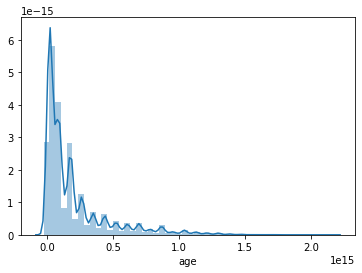

In [538]:
sns_age = sns.distplot(df['age'])
fig = sns_age.get_figure()

In [539]:
df.animal_type.value_counts()

Dog          44237
Cat          29419
Other         4244
Bird           334
Livestock        9
Name: animal_type, dtype: int64

In [540]:
df.loc[df.animal_type.isin(['Bird', 'Livestock']),'animal_type'] = 'Other'

In [541]:
df.animal_type.value_counts()

Dog      44237
Cat      29419
Other     4587
Name: animal_type, dtype: int64

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78243 entries, 0 to 78255
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   animal_type       78243 non-null  object 
 1   breed             78243 non-null  object 
 2   color             78243 non-null  object 
 3   outcome_subtype   35963 non-null  object 
 4   outcome_type      78243 non-null  object 
 5   sex_upon_outcome  78243 non-null  object 
 6   age               78243 non-null  float64
dtypes: float64(1), object(6)
memory usage: 4.8+ MB


In [543]:
df.color.value_counts()

Black/White                8151
Black                      6600
Brown Tabby                4445
Brown                      3483
White                      2784
                           ... 
Liver/Brown Brindle           1
Blue Merle/Cream              1
Brown Brindle/Gray            1
Blue Tick/Brown Brindle       1
Orange/Orange Tabby           1
Name: color, Length: 525, dtype: int64

In [544]:
df.loc[~df.color.isin(['Black/White', 'Black', 'Brown Tabby', 'Brown', 'White']),'color'] = 'Other'

In [545]:
df.color.value_counts()

Other          52780
Black/White     8151
Black           6600
Brown Tabby     4445
Brown           3483
White           2784
Name: color, dtype: int64

In [546]:
df.breed.value_counts()

Domestic Shorthair Mix                23332
Pit Bull Mix                           6133
Chihuahua Shorthair Mix                4733
Labrador Retriever Mix                 4607
Domestic Medium Hair Mix               2323
                                      ...  
Coton De Tulear                           1
Miniature Schnauzer/Dachshund             1
Whippet/Borzoi                            1
Treeing Walker Coonhound/Dachshund        1
Miniature Schnauzer/Border Collie         1
Name: breed, Length: 2128, dtype: int64

Вариантов слишком много, лучше удалить.

In [547]:
df.drop(columns=['breed'], inplace=True)

In [548]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78243 entries, 0 to 78255
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   animal_type       78243 non-null  object 
 1   color             78243 non-null  object 
 2   outcome_subtype   35963 non-null  object 
 3   outcome_type      78243 non-null  object 
 4   sex_upon_outcome  78243 non-null  object 
 5   age               78243 non-null  float64
dtypes: float64(1), object(5)
memory usage: 4.2+ MB


In [549]:
df.outcome_subtype.value_counts()

Partner                19660
Foster                  5558
SCRP                    3211
Suffering               2514
Rabies Risk             2417
Snr                      626
Aggressive               506
Offsite                  367
In Kennel                343
Medical                  259
In Foster                182
Behavior                 142
At Vet                    59
Enroute                   45
Underage                  28
Court/Investigation       18
In Surgery                16
Possible Theft             9
Barn                       3
Name: outcome_subtype, dtype: int64

In [550]:
df.loc[df.outcome_subtype.isin(['Rabies Risk', 'Suffering', 'Aggressive', 'Medical', 'Behavior', 'Court/Investigation']), 'tag'] = 1
df.tag.fillna(2, inplace=True)

In [551]:
df.head()

,animal_type,color,outcome_subtype,outcome_type,sex_upon_outcome,age,tag
0,Cat,Other,Partner,Transfer,Intact Male,3.550685e+12,2.0
1,Dog,Other,Partner,Transfer,Spayed Female,8.663671e+13,2.0
2,Dog,Other,NaN,Adoption,Neutered Male,1.015496e+14,2.0
3,Dog,White,Partner,Transfer,Neutered Male,7.811507e+14,2.0
4,Other,Brown,Rabies Risk,other,Unknown,4.284493e+13,1.0


In [552]:
df.drop(columns=['outcome_subtype'], inplace=True)

In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78243 entries, 0 to 78255
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   animal_type       78243 non-null  object 
 1   color             78243 non-null  object 
 2   outcome_type      78243 non-null  object 
 3   sex_upon_outcome  78243 non-null  object 
 4   age               78243 non-null  float64
 5   tag               78243 non-null  float64
dtypes: float64(2), object(4)
memory usage: 4.2+ MB


In [554]:
df.sex_upon_outcome.value_counts()

Neutered Male    27783
Spayed Female    25203
Intact Male       9547
Intact Female     9140
Unknown           6570
Name: sex_upon_outcome, dtype: int64

In [555]:
df.loc[df.sex_upon_outcome.str.endswith('Male',  na=False), 'sex'] = 1 
df.loc[df.sex_upon_outcome.str.endswith('Female',  na=False), 'sex'] = 2
df.sex.fillna(3, inplace=True)

df.loc[df.sex_upon_outcome.str.contains('Female|Male',  na=False), 'sterilized'] = 1
df.sterilized.fillna(2, inplace=True)

In [556]:
df.drop(columns=['sex_upon_outcome'], inplace=True)

In [557]:
df.head()

,animal_type,color,outcome_type,age,tag,sex,sterilized
0,Cat,Other,Transfer,3.550685e+12,2.0,1.0,1.0
1,Dog,Other,Transfer,8.663671e+13,2.0,2.0,1.0
2,Dog,Other,Adoption,1.015496e+14,2.0,1.0,1.0
3,Dog,White,Transfer,7.811507e+14,2.0,1.0,1.0
4,Other,Brown,other,4.284493e+13,1.0,3.0,2.0


In [558]:
df.loc[df.color == 'Other', 'color'] = 1 
df.loc[df.color == 'Black/White', 'color'] = 2 
df.loc[df.color == 'Black', 'color'] = 3 
df.loc[df.color == 'Brown Tabby', 'color'] = 4 
df.loc[df.color == 'Brown', 'color'] = 5 
df.loc[df.color == 'White', 'color'] = 6

In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78243 entries, 0 to 78255
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   animal_type   78243 non-null  object 
 1   color         78243 non-null  object 
 2   outcome_type  78243 non-null  object 
 3   age           78243 non-null  float64
 4   tag           78243 non-null  float64
 5   sex           78243 non-null  float64
 6   sterilized    78243 non-null  float64
dtypes: float64(4), object(3)
memory usage: 4.8+ MB


In [560]:
df.loc[df.animal_type == 'Dog', 'animal_type'] = 1
df.loc[df.animal_type == 'Cat', 'animal_type'] = 2 
df.loc[df.animal_type == 'Other', 'animal_type'] = 3

In [561]:
df.loc[df.outcome_type == 'Transfer', 'outcome_type'] = 1
df.loc[df.outcome_type == 'Adoption', 'outcome_type'] = 2 
df.loc[df.outcome_type == 'other', 'outcome_type'] = 3

In [562]:
df.head()

,animal_type,color,outcome_type,age,tag,sex,sterilized
0,2,1,1,3.550685e+12,2.0,1.0,1.0
1,1,1,1,8.663671e+13,2.0,2.0,1.0
2,1,1,2,1.015496e+14,2.0,1.0,1.0
3,1,6,1,7.811507e+14,2.0,1.0,1.0
4,3,5,3,4.284493e+13,1.0,3.0,2.0


In [563]:
df.describe()

,age,tag,sex,sterilized
count,7.824300e+04,78243.000000,78243.000000,78243.000000
mean,1.934059e+14,1.925156,1.606866,1.083969
std,2.549613e+14,0.263141,0.637592,0.277343
min,-2.911562e+13,1.000000,1.000000,1.000000
25%,2.248767e+13,2.000000,1.000000,1.000000
50%,8.782027e+13,2.000000,2.000000,1.000000
75%,2.594367e+14,2.000000,2.000000,1.000000
max,2.162841e+15,2.000000,3.000000,2.000000


In [564]:
df.loc[df.age < 0]

,animal_type,color,outcome_type,age,tag,sex,sterilized
19814,1,2,1,-2.911562e+13,2.0,2.0,1.0
22804,1,2,2,-2.201425e+13,2.0,1.0,1.0
45764,2,1,2,-2.367123e+12,2.0,2.0,1.0
46565,2,1,3,-1.183562e+13,1.0,2.0,1.0
47054,1,3,3,-7.101370e+11,2.0,1.0,1.0
50533,2,1,1,-2.367123e+11,2.0,3.0,2.0
52977,2,1,1,-5.681096e+12,2.0,1.0,1.0
64745,2,3,2,-2.296110e+13,2.0,2.0,1.0


In [565]:
df = df.loc[df.age > 0]

In [566]:
df.head()

,animal_type,color,outcome_type,age,tag,sex,sterilized
0,2,1,1,3.550685e+12,2.0,1.0,1.0
1,1,1,1,8.663671e+13,2.0,2.0,1.0
2,1,1,2,1.015496e+14,2.0,1.0,1.0
3,1,6,1,7.811507e+14,2.0,1.0,1.0
4,3,5,3,4.284493e+13,1.0,3.0,2.0


In [567]:
df.animal_type = pd.to_numeric(df.animal_type)
df.color = pd.to_numeric(df.color)
df.outcome_type = pd.to_numeric(df.outcome_type)

In [568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78149 entries, 0 to 78255
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   animal_type   78149 non-null  int64  
 1   color         78149 non-null  int64  
 2   outcome_type  78149 non-null  int64  
 3   age           78149 non-null  float64
 4   tag           78149 non-null  float64
 5   sex           78149 non-null  float64
 6   sterilized    78149 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 4.8 MB


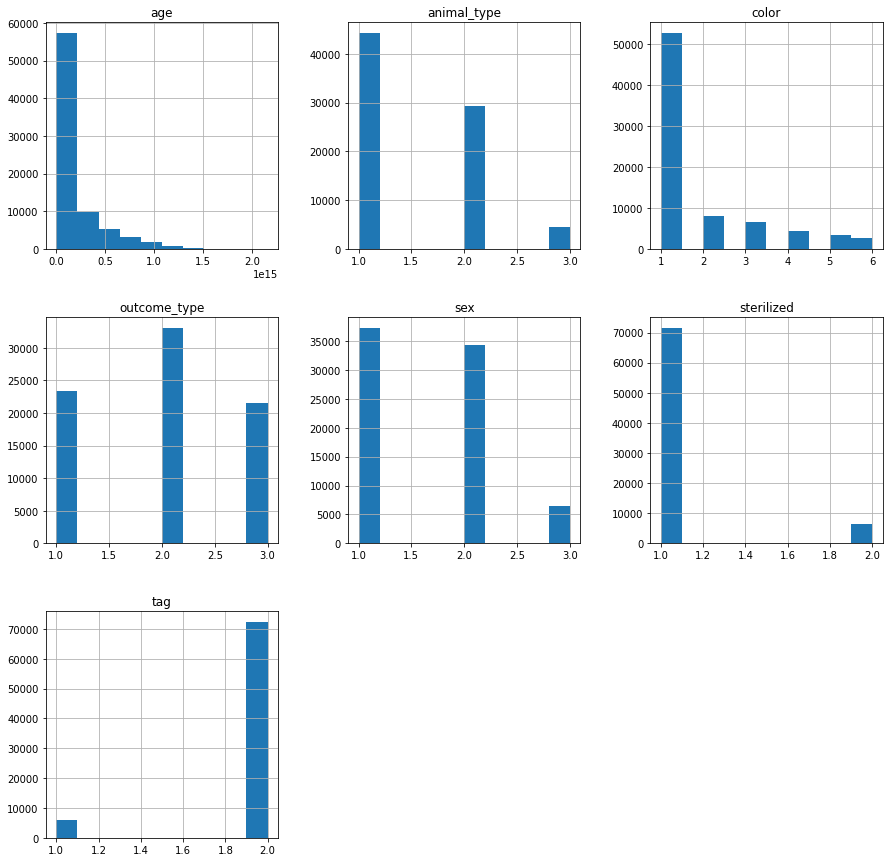

In [569]:
df.hist(figsize=(15,15))
plt.show()

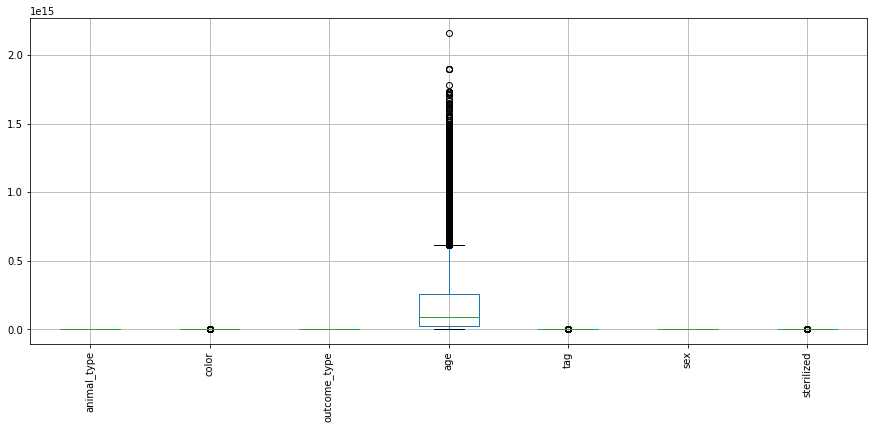

In [570]:
boxplot = df.boxplot(figsize=(15,6), rot=90)

In [571]:
df = df.loc[df.age <= df.age.quantile(0.95)]

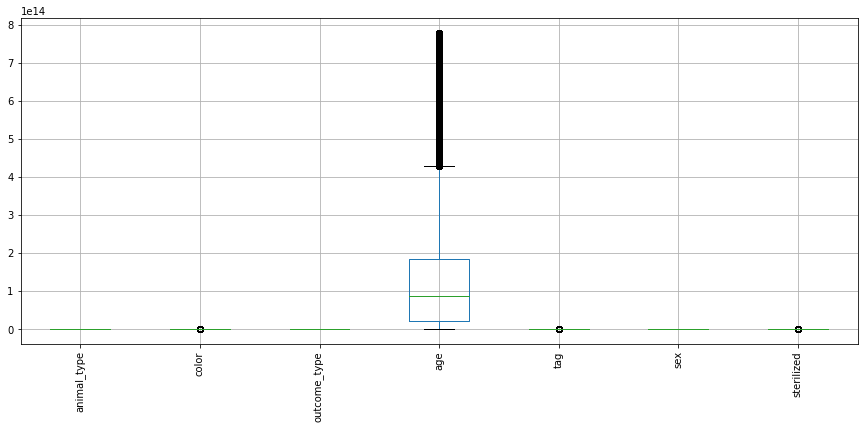

In [572]:
boxplot = df.boxplot(figsize=(15,6), rot=90)

In [573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74241 entries, 0 to 78255
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   animal_type   74241 non-null  int64  
 1   color         74241 non-null  int64  
 2   outcome_type  74241 non-null  int64  
 3   age           74241 non-null  float64
 4   tag           74241 non-null  float64
 5   sex           74241 non-null  float64
 6   sterilized    74241 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 4.5 MB


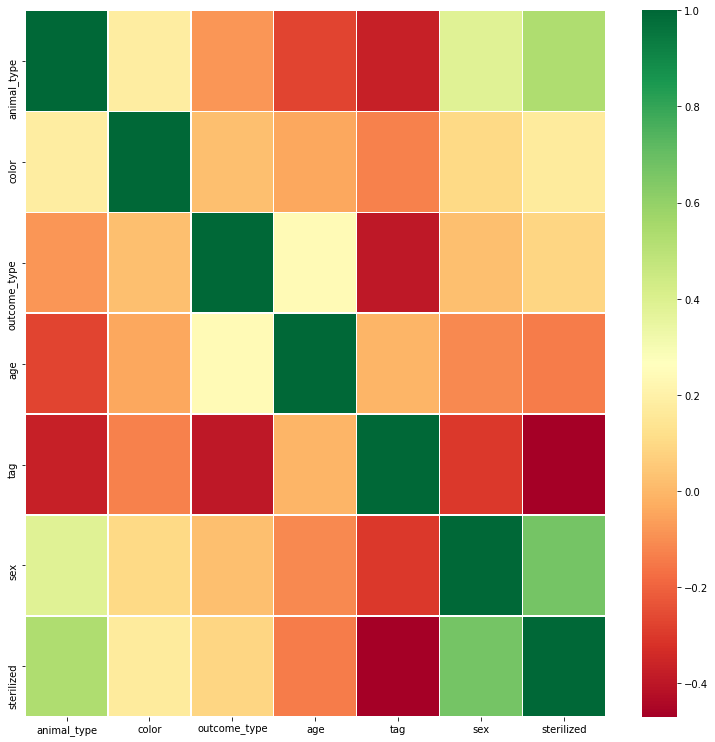

In [574]:
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(df.corr(), decimals=2)
sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)
plt.show()

In [576]:
input_x = df.drop(columns = 'outcome_type')
output_y = df.outcome_type

In [577]:
from sklearn.model_selection import train_test_split
# разделение данные на тренировочные и тестовые
x_train, x_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.3) 

from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(x_train, y_train)

RandomForestClassifier()

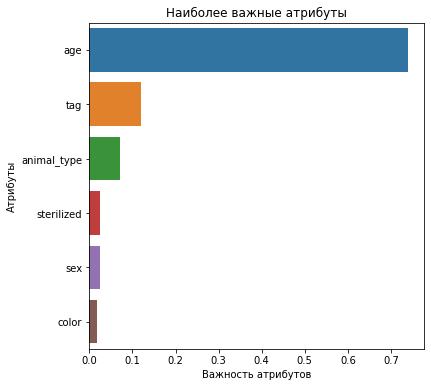

In [578]:
# Наиболее важные атрибуты для модели Random Forest:
headers = list(x_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [579]:
# Посчитаем качество модели - classification report:
from sklearn.metrics import classification_report

model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           1       0.65      0.53      0.58      6713
           2       0.65      0.78      0.71      9668
           3       0.71      0.64      0.67      5892

    accuracy                           0.67     22273
   macro avg       0.67      0.65      0.65     22273
weighted avg       0.67      0.67      0.66     22273



Точность получилась не очень.

In [580]:
df = df.loc[df.age <= df.age.quantile(0.75)]

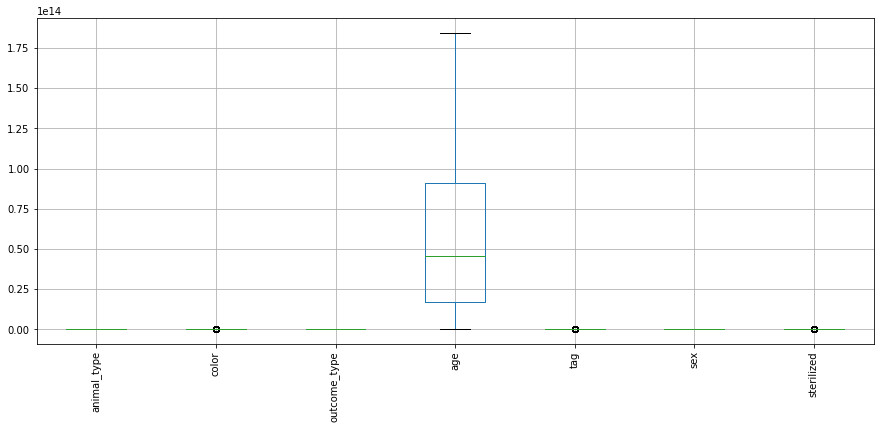

In [581]:
boxplot = df.boxplot(figsize=(15,6), rot=90)

In [582]:
input_x = df.drop(columns = 'outcome_type')
output_y = df.outcome_type

In [583]:
from sklearn.model_selection import train_test_split
# разделение данные на тренировочные и тестовые
x_train, x_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.3) 

from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(x_train, y_train)

RandomForestClassifier()

In [584]:
# Посчитаем качество модели - classification report:
from sklearn.metrics import classification_report

model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           1       0.72      0.60      0.65      5631
           2       0.70      0.82      0.75      7652
           3       0.76      0.65      0.70      3424

    accuracy                           0.71     16707
   macro avg       0.72      0.69      0.70     16707
weighted avg       0.72      0.71      0.71     16707



In [594]:
input_x = df.drop(columns = ['outcome_type', 'sterilized', 'color'])
output_y = df.outcome_type

In [595]:
from sklearn.model_selection import train_test_split
# разделение данные на тренировочные и тестовые
x_train, x_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.3) 

from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(x_train, y_train)

RandomForestClassifier()

In [596]:
# Посчитаем качество модели - classification report:
from sklearn.metrics import classification_report

model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           1       0.76      0.57      0.65      5671
           2       0.69      0.87      0.77      7598
           3       0.78      0.65      0.71      3438

    accuracy                           0.72     16707
   macro avg       0.74      0.70      0.71     16707
weighted avg       0.73      0.72      0.72     16707

